In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib

In [51]:
bp = pd.read_csv('../logs/maze2d-umaze-v1/plans/defaults/freq1_H15_beam128/0/BEAM_PLAN-data.csv')
qbp = pd.read_csv('../logs/maze2d-umaze-v1/plans/defaults/freq1_H15_beam128/0/Q_BEAM_PLAN-data.csv')
mcts = pd.read_csv('../logs/maze2d-umaze-v1/plans/defaults/freq1_H15_beam128/0/week_MCTS-data.csv')
# astar = pd.read_csv('../logs/maze2d-umaze-v1/plans/defaults/freq1_H15_beam128/far_version/A_STAR_BEAM_PLAN-data.csv')
# bfirst = pd.read_csv('../logs/maze2d-umaze-v1/plans/defaults/freq1_H15_beam128/far_version/Best_FIRST_BEAM_PLAN-data.csv')
# bp.head()

In [39]:
def show_traj(df):
    
    goals = pd.DataFrame([[1,1],[1,2],[1,3],[2,3],[3,3],[3,2],[3,1]], columns=['x','y'])
    BIGGER_SIZE = 25
    plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    fig, ax = plt.subplots(figsize=(12,8))
    plt.scatter(x = goals['x'], y = goals['y'],lw=0.05, c='red',marker='*',s=300, label='Goals')#,s=obs['size'],c=obs['color'])

    df = df.iloc[10:,:]
    plt.scatter(x = df['x'], y = df['y'],lw=0.05,alpha=0.7,c='tab:blue', s=200)#,s=obs['size'],c=obs['color'])
       

    plt.legend(loc='lower right')
    # plt.savefig('render.png', dpi=800, bbox_inches='tight')
    plt.show()

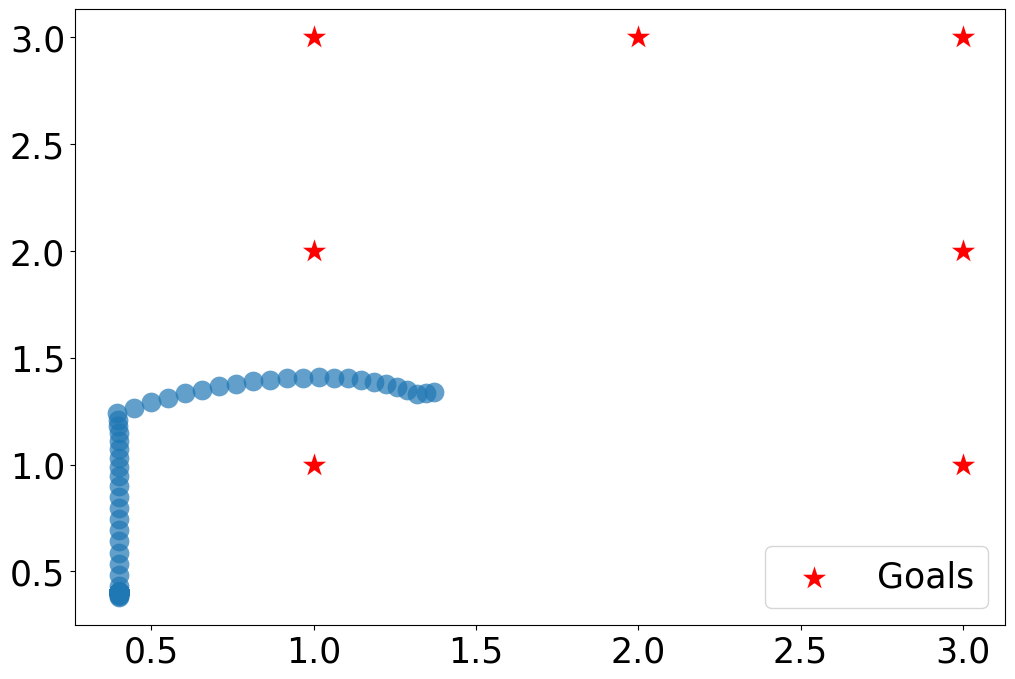

In [40]:
show_traj(bfirst)

In [52]:
def show_traj(df_list, names):
    
    goals = pd.DataFrame([[1,1],[1,2],[1,3],[2,3],[3,3],[3,2],[3,1]], columns=['x','y'])
    BIGGER_SIZE = 25
    plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    fig, ax = plt.subplots(figsize=(12,8))

    for i, name in zip(df_list, names):
        if name == 'Q-DA':
            plt.scatter(x = i['x'], y = i['y'],lw=0.05,alpha=0.7,c='tab:blue', s=200, label=name)#,s=obs['size'],c=obs['color'])
        elif name == 'DA':
            plt.scatter(x = i['x'], y = i['y'],lw=0.05, alpha=0.3,c='tab:green', s=200, label=name)#,s=obs['size'],c=obs['color'])
        elif name == 'MCTS':
            plt.scatter(x = i['x'], y = i['y'],lw=0.05, alpha=0.3,c='tab:red', s=200, label=name)#,s=obs['size'],c=obs['color'])
        if name == 'Astar':
            plt.scatter(x = i['x'], y = i['y'],lw=0.05, alpha=0.3,c='yellow', s=200, label=name)
        elif name == 'Best-First':
            plt.scatter(x = i['x'], y = i['y'],lw=0.05, alpha=0.3, c='purple', s=200, label=name)
    # plt.xlim((0.9,1.1))
    # plt.ylim((0.75,2.25))
    plt.scatter(x = goals['x'], y = goals['y'],lw=0.05, c='red',marker='*',s=300, label='Goals')#,s=obs['size'],c=obs['color'])

    ax.xaxis.set_major_locator(ticker.NullLocator())
    ax.yaxis.set_major_locator(ticker.NullLocator())
    plt.legend()
    plt.savefig('render.png', dpi=800, bbox_inches='tight')
    plt.show()

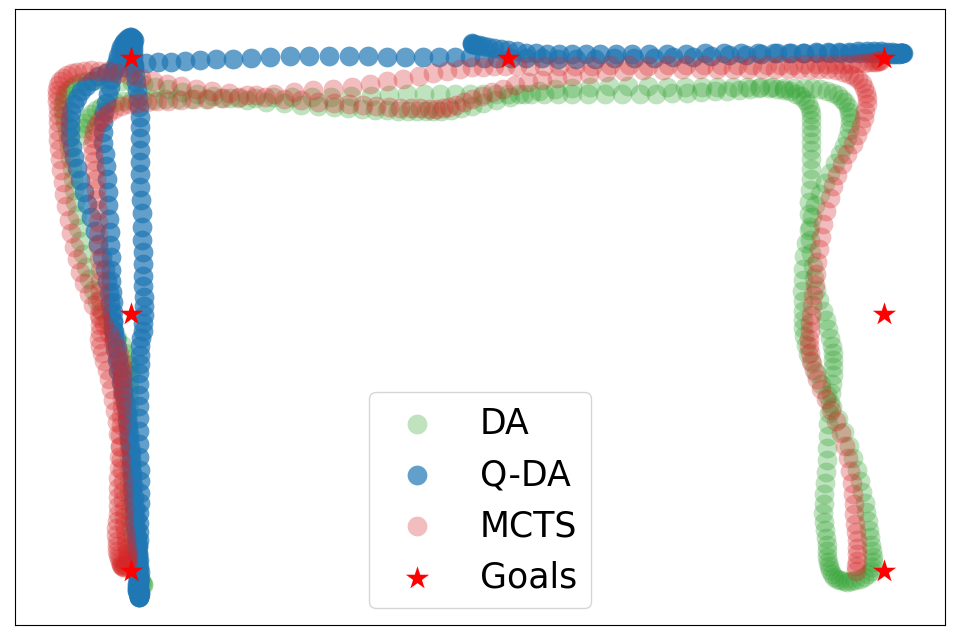

In [53]:
show_traj([bp, qbp, mcts], ['DA','Q-DA','MCTS'])


In [43]:
mcts['reward'].sum()

1.0